### proyecto de casas en israel

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #para hacer graficas
import seaborn as sns #hacer graficas
import numpy as np #metodo numericos
from scipy.stats import norm #Este es el que se utiliza para poder ver metodos estadisticos
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings 

%matplotlib inline

# Step 1 



1.   Leemos mi archivo CSV.
2.   verificamos cuales son las columnas de mis dataset.
3.   observamos si hay valores nulos dentro de mi dataset y los tipos de valores que tenemos dentro de este.



In [2]:
df=pd.read_csv('precio casas.csv',sep=';')

In [3]:
df.head()

Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0    63     1     True       True      True         Shahran  1.850000e+09   
1    60     1     True       True      True         Shahran  1.850000e+09   
2    79     2     True       True      True          Pardis  5.500000e+08   
3    95     2     True       True      True   Shahrake Qods  9.025000e+08   
4   123     2     True       True      True  Shahrake Gharb  7.000000e+09   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33

In [4]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [5]:
df.shape

(3479, 8)

# Step 2

1. Decidimos obversar cuales son los valores que estan nulos. 
2. Nos enfretamos a nuestra primera decisión ¿ Que hago con los valores nulos, los promedio, los elimino o elimino la columna?


In [6]:
df[pd.isnull(df["Address"])==True].head(3)

Area  Room  Parking  Warehouse  Elevator Address         Price  \
43     60     2     True       True      True     NaN  2.650000e+09   
662    85     2     True       True      True     NaN  1.955000e+09   
706   117     2     True       True      True     NaN  6.500000e+09   

     Price(USD)  
43     88333.33  
662    65166.67  
706   216666.67

Vemos que son valores de dirección que de cierta forma nos pueden aportar valor a nuestro EDA. Por lo cual observaremos la dirección de los precios de las casas. sin embargo, para objeto de nuestro EDA vamos a elminar estos datos para ver la distribución por Addrees.

In [7]:
idx=df[pd.isnull(df["Address"])==True].index.tolist()

In [8]:
df1=df.drop(index=idx)

In [9]:
df1.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

En este apartado vamos agregar columnas que nos permitan tener una mejor lectura de la variables booleanas

In [10]:
df1["Park"]=df1["Parking"].map({True:"YES",False:"NO"})
df1["Ware"]=df1["Warehouse"].map({True:"YES",False:"NO"})
df1["Ele"]=df1["Elevator"].map({True:"YES",False:"NO"})

# Step 3



1.   Vamos a ver los tipos de distribución, presentes en nuestro datos numericos
2.   Vamor a ver la contabilización de nuestras variables Categoricas
3.   vamos a ver las correlaciones presentes en mis datos.



In [42]:
figure ,ax = plt.subplots(2,3,figsize=(20,10),dpi=1000)
plt.style.use("seaborn")
figure.suptitle("Distribución de los valores numericos")
ax[0,0]=sns.histplot(x=df1["Area"],kde=True,ax=ax[0,0])
ax[0,1]=sns.histplot(x=df1["Room"],kde=True,ax=ax[0,1])
ax[0,2]=sns.histplot(x=df1["Price(USD)"],kde=True,ax=ax[0,2])
ax[1,0]=sns.countplot(data=df1,x=df1["Park"],ax=ax[1,0],palette="tab10")
ax[1,1]=sns.countplot(data=df1,x=df1["Ware"],ax=ax[1,1],palette="rocket")
ax[1,2]=sns.countplot(data=df1,x=df1["Ele"],ax=ax[1,2],palette="tab10")
ax[1,0].set_ylim(0,4000)
ax[1,1].set_ylim(0,4000)
ax[1,2].set_ylim(0,4000)
ax[0,0].set_xlabel("Area")
ax[0,1].set_xlabel("Rooms")
ax[0,2].set_xlabel("Prices (USD)");


In [12]:
df1.describe().round(0)


Area    Room         Price  Price(USD)
count  3456.0  3456.0  3.456000e+03      3456.0
mean    107.0     2.0  5.379957e+09    179332.0
std      70.0     1.0  8.121729e+09    270724.0
min       1.0     0.0  3.600000e+06       120.0
25%      69.0     2.0  1.420000e+09     47333.0
50%      90.0     2.0  2.900000e+09     96667.0
75%     120.0     2.0  6.000000e+09    200000.0
max     929.0     5.0  9.240000e+10   3080000.0

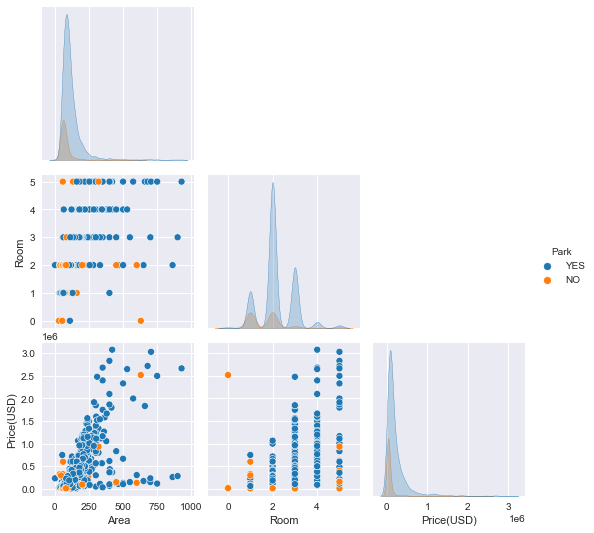

In [13]:
sns.pairplot(df1,x_vars=["Area","Room","Price(USD)"],y_vars=["Area","Room","Price(USD)"],palette="tab10",hue="Park",corner=True)

In [14]:
df_corr=df1.corr()

<AxesSubplot:>

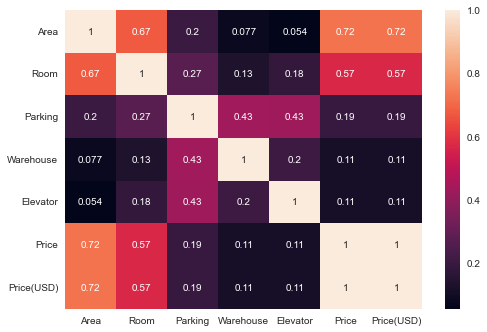

In [15]:
sns.heatmap(df_corr,annot=True)

Observando las medidas de tendencia estandar, que hemos graficado anteriormente, observamos una correlación positiva entre el Area, room y Price(USD).

<AxesSubplot:xlabel='Price(USD)', ylabel='Area'>

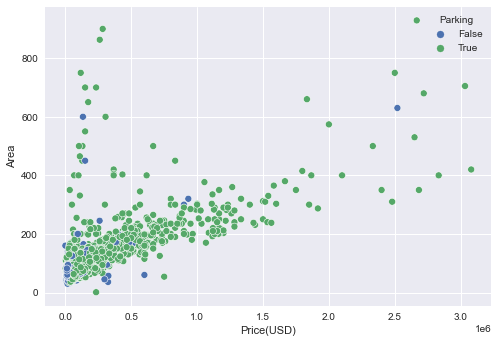

In [16]:
sns.scatterplot(data=df1,x="Price(USD)",y="Area",hue="Parking")

Observamos que el parqueadero es un componente importante, ya que la mayoría de las viviendas cuentan con este servicio. El cual seguiremos tomando como objeto de estudio. A continuación, ahondaremos en las direcciones para identificar donde se encuentran las más apetecidas y las de mayor oferta. 

# Step 4

1. ubicaremos las direcciones mas apetecidas y las que mas volumen de oferta tienen para concluir nuestro EDA y darle paso a nustro Algoritmo de Machine Learning

In [17]:
df1["Address"].nunique() # tenemos 192 direcciones unicas donde se concentran nuestros datos.

192

In [18]:
df["Address"].value_counts().head(10)

Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                141
Shahran                   130
Saadat Abad               129
Parand                    127
Shahr-e-Ziba              109
Southern Janatabad         93
Central Janatabad          91
Name: Address, dtype: int64

In [19]:
df1.shape[0]

3456

In [20]:
li=[x for x in range(0,150)]
por=[]
for i in range(0,150):
    por.append((df1["Address"].value_counts().head(i).sum())/df1.shape[0])

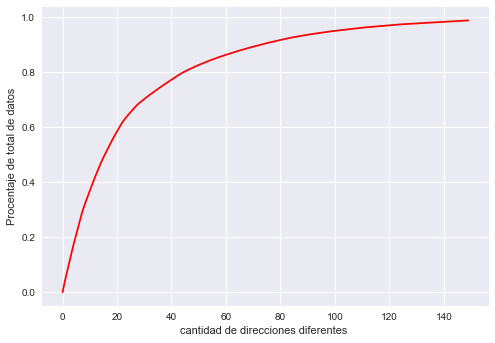

In [43]:
plt.plot(li,por,"r")
plt.xlabel("cantidad de direcciones diferentes ")
plt.ylabel("Procentaje de total de datos");

In [104]:
suma=(df1["Address"].value_counts().head(20).sum())/df1.shape[0]
print(f'El porcentaje que representan las 50 direcciones que mas se venden casas en teheran es de {suma:.2%}')

El porcentaje que representan las 50 direcciones que mas se venden casas en teheran es de 58.39%


Estos datos que acabamos de averiguar me hacen preguntar ¿Por qué las primeras 20 direcciones representan el 58.4% de mis datos? ¿Qué características especiales tienen estos barrios en cuestión de Área, price(USD), Rooms, Park ?

In [105]:
dir=df1["Address"].value_counts().head(20).index

In [106]:
df2=df1[df1["Address"].isin(dir)]

In [107]:
plt.figure(figsize=(20,20),dpi=1000)
sns.boxplot(data=df2,y=df2.Address,x=df2["Area"])
plt.xticks(rotation=90);


In [108]:
plt.figure(figsize=(20,20),dpi=1000)
sns.boxplot(data=df2,y=df2.Address,x=df2["Price(USD)"])
plt.xticks(rotation=90);

Al observar las distribuciones, nos damos cuenta de algunas relaciones que pueden exitir entre el area y precio de ciertas casas, por esta razon vamos ahondar un poco mas y graficar un sactter plot por barrio de estas dos variables.

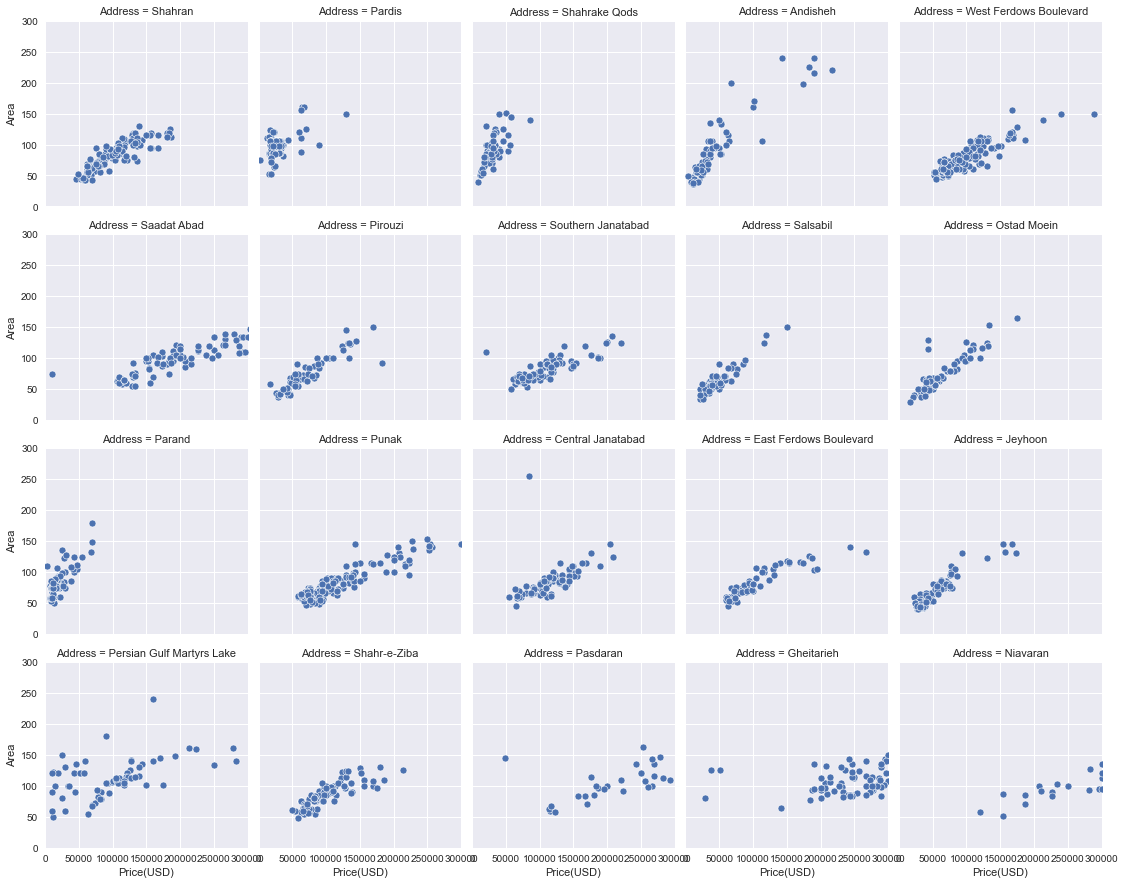

In [140]:
sns.relplot(data=df2,x="Price(USD)",col=df2["Address"],y="Area",col_wrap=5,height=3.1)
plt.xlim(0,300000);
plt.ylim(0,300);

In [102]:
df2["Area"].describe().round(0)

count    2853.0
mean      105.0
std        63.0
min         1.0
25%        68.0
50%        90.0
75%       120.0
max       900.0
Name: Area, dtype: float64

In [90]:
df2r=df2[["Address","Area"]]

In [93]:
df2r=df2r.groupby(["Address"],as_index=False).std()

despues de ver la grafica anterior hay una serie de Address que me llaman la atencion, 1. por que no tiene valores anormales y dos por que recogen toda la gama de precios que puede haber, este es el caso como de Elahie, aqdashie, farmanieh y Velenjak

In [28]:
vel=df2[df2["Address"]=="Jeyhoon"]

<AxesSubplot:xlabel='Room', ylabel='Count'>

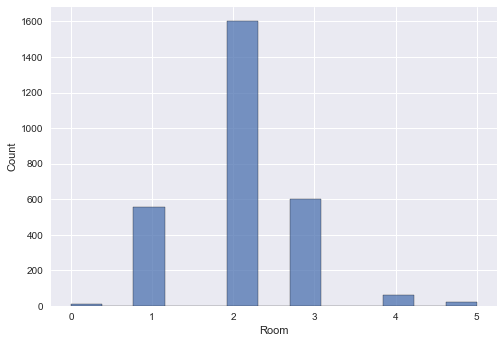

In [29]:
sns.histplot(data=df2,x=df2["Room"])

<AxesSubplot:xlabel='Area'>

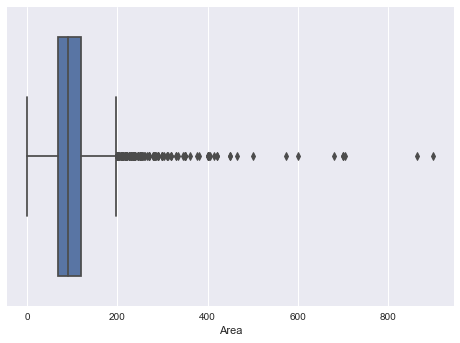

In [30]:
sns.boxplot(data=df2,x=df2["Area"])

In [31]:
df2.describe().round(0)

Area    Room         Price  Price(USD)
count  2853.0  2853.0  2.853000e+03      2853.0
mean    105.0     2.0  5.379831e+09    179328.0
std      63.0     1.0  7.819196e+09    260640.0
min       1.0     0.0  6.000000e+07      2000.0
25%      68.0     2.0  1.400000e+09     46667.0
50%      90.0     2.0  2.900000e+09     96667.0
75%     120.0     2.0  6.150000e+09    205000.0
max     900.0     5.0  9.240000e+10   3080000.0

In [ ]:
df3=pd.concat([df2["Area"],df2["Room"],df2["Price(USD)"]],axis=1)

In [ ]:
df3.head(10)

In [ ]:
corre=df3.corr()

In [ ]:
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corre, vmax=0.8,square=True,annot=True)

##### En este caso nos damos cuenta que las relaciones mas importantes para las casa de teheran son las de area y precio, y menor medida la cantidad de rooms con la cantidad de area